<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# __K Means Clustering with Python__

Estimated time needed: **45** minutes


How do brands always know which new products should recommend to me? Can they read my mind? Well, sort of. By (legally) gathering information about you and your purchasing habits, corporations are able to group you with other customers that have similar characteristics. K Means clustering is one such algorithm that can categorize similar people! Then, companies can determine this population's potential preferences and personalize your experience with the brand, which ranges from product recommendations to email marketing content. 

In this notebook, you will learn the fundamentals of how to accomplish grouping with K Means and use it for segmenting mall customers and images.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/online-shopping.jpg" style="width: 60%">


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Introduction">Introduction</a>
        <ol>
            <li><a href="#How-does-K-Means-Clustering-work?">How does K Means Clustering work?</a></li>
        </ol>
    </li>
    <li><a href="#Example-1:-Visual-intuition">Example 1: Visual Intuition</a></li>
    <li>
        <a href="#Example-2:-Segmenting-Customer-Data">Example 2: Segmenting Customer Data</a>
        <ol>
            <li><a href="#Problem-Statement">Problem Statement</a></li>
            <li><a href="#About-the-dataset">About the Dataset</a></li>
            <li><a href="#Loading-the-dataset">Loading the Dataset</a></li>
            <li><a href="#Getting-familiar-with-the-data">Getting familiar with the data</a></li>
            <li><a href="#Clustering-the-data-using-K-Means">Clustering the data using K Means</a></li>
        </ol>
    </li>
    <li>
        <a href="#Example-3:-Image-Segmentation">Example 3: Image Segmentation</a>
        <ol>
            <li><a href="#Loading-the-data">Loading the Data</a></li>
            <li><a href="#Segmenting-the-image-using-2-clusters">Segmenting the image using 2 clusters</a></li>
            <li><a href="#Converting-to-black-and-white">Converting to black and white</a></li>
        </ol>
    </li>    
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Fitting-KMeans-With-k=2">Exercise 1 - Fitting K Means with k=2</a></li>
    <li><a href="#Exercise-2---Viewing-Segmented-Image">Exercise 2 - Viewing Segmented Image</a></li>
    <li><a href="#Exercise-3---Fitting-KMeans-With-k=4-and-Viewing-Segmented-Image">Exercise 3 - Fitting K Means with k=4 and Viewing Segmented Image</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Explain the theory behind K Means Clustering
 - Implement K Means Clustering to perform exploratory data analysis
 - Perform Image segmentation using K Means


----


## Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the corresponding code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

### Importing Required Libraries


In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

## Introduction


K Means Clustering is an unsupervised machine learning algorithm that organizes data into distinct groups based on certain similarities. The principle underlying the algorithm is simple to understand and is a great introduction to the potential of unsupervised learning algorithms for exploratory data analysis. In this lab, we will brush up on the basic theory underlying the algorithm and then go ahead and apply it ourselves to a real problem.


### About K Means

|       Pros       |       Cons       |
| ---------------- | ------- |
| Easy to implement | Must manually chose K |
| Always converges to local minimum | Not guaranteed to find global minimum |
| Scales well to large datasets | May not perform well on data of varying density |
| Generalizes to clusters of different shapes and sizes | Clusters are biased by outliers |


### How does K Means Clustering work?


The KMeans algorithm is quite simple and can be broken down into the following steps:

<ol>
    <li>We specify the hyperparameter <code>k</code>, which refers to the number of clusters we want our data to be clustered into.</li>
    <li>Then <code>k</code> centroids, or cluster-means, are initialized at random.</li>
    <li>Finally, the optimal centroid locations are found. This is done by the following algorithmic loop:</li>
    <ol>
        <li><b>Assignment step:</b> Assign each data point to the nearest centroid (calculated as the squared distance from the data point to centroid).</li>
        <li><b>Update step:</b> Recompute each centroid as the mean of the data points assigned to that cluster in the previous step.</li>
    </ol>
    <li>We repeat the above step until the centroid locations remain unchanged. This tells us the algorithm has converged on a local optima and gives us the final cluster assignments for that run.</li>
</ol>


## Example 1: Visual intuition
Take a look at the following animation for some physical intuition of what's going on during each iteration.

It shows several iterations of K Means Clustering (steps 3 & 4 in previous section) applied to a sample dataset with <code>k = 2</code> clusters.

![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/KMeansClustering_example.gif)

In each iteration, you can see the previous locations of the centroids (faded) and their current location after they were moved to the mean of the data points assigned to that cluster. The data points are colored by the cluster they are assigned to after that iteration.

Finally, on iteration 6, we see the centroids of the clusters remain unchanged - this means the KMeans algorithm has converged and finished.


## Example 2: Segmenting Customer Data

While the theory and implementation of these algorithms are fascinating in their own right, as data scientists we're driven by the insights we can uncover and the stories we can tell with data.

Now more than ever, companies are making data driven business decisions, in part thanks to the massive increase of data available, as well as the availability of computational power to process and make sense of the data.

Customer segmentation is a process where customers are grouped together based on some common characteristics. For example, customers can be divided based on age, gender, income, marital status, and others. Segmenting customers in this way can have several applications for a business. For instance, common characteristics of the most profitable customers can be identified and a tailored marketing strategy can be implemented to target them.

Let's have a go at customer segmentation using the K Means Clustering algorithm.


### Problem Statement

Suppose you are a data scientist at MegaMind Sporting Goods Ltd.

You've been tasked with segmenting customers into groups depending on their purchasing habits.

Once you have this information, your colleague John will be able to generate clothing recommendations tailored for each customer group.


### About the dataset

We will explore a simple example of customer segmentation using the [Mall Customers](https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv) dataset. This is an artificial dataset that contains data on customers of a shopping mall. In particular, the following features are given about each customer.

* **CustomerID** - A unique identifying number for each customer
* **Gender**
* **Age**
* **Annual Income** - The annual income of the customer given in thousands of dollars
* **Spending Score** - A value given to the customer based on their spending habits, such as total spending and frequency. A higher value indicates a higher value customer for the mall


### Loading the dataset


In [3]:
# Download the dataset and read it into a Pandas dataframe
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/CustomerData.csv', index_col=0)

Let's take a peek at our dataset to ensure it was loaded properly.


In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Getting familiar with the data

First, let's take a look at the data we have to gain a better general understanding of it before we attempt any clustering.

Let's start by looking at the distributions of some of the features.


We can start by analyzing the ratio of male to female customers that were surveyed.


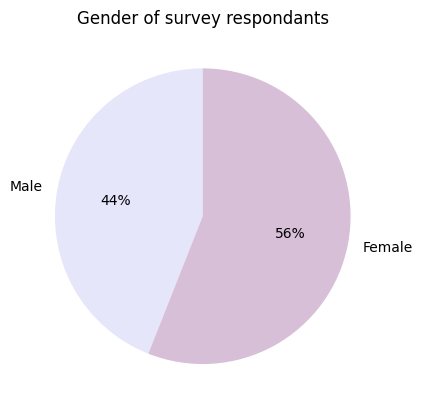

In [ ]:
# Đếm số lượng người có giới tính 'Male'
num_male = df[df['Gender'] == 'Male'].shape[0]

# Đếm số lượng người có giới tính 'Female'
num_female = df[df['Gender'] == 'Female'].shape[0]

# Vẽ biểu đồ tròn thể hiện tỷ lệ giới tính
plt.pie(
    [num_male, num_female],         # Dữ liệu số lượng từng giới tính
    labels=['Male', 'Female'],      # Nhãn hiển thị trên biểu đồ
    startangle=90,                  # Xoay biểu đồ để bắt đầu từ góc 90 độ
    autopct='%1.f%%',               # Hiển thị phần trăm (dạng làm tròn)
    colors=['lavender', 'thistle']) # Màu sắc cho từng phần biểu đồ

# Đặt tiêu đề cho biểu đồ
plt.title('Gender of survey respondants')

# Hiển thị biểu đồ
plt.show()


We see that we have slightly more female respondents in our survey. Next, let's plot histograms of the age and annual incomes of the customers.


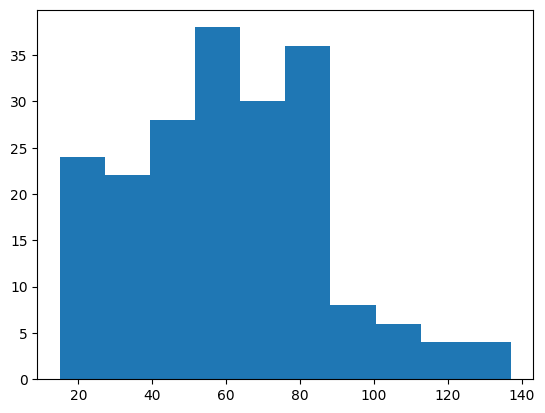

In [6]:
plt.hist(df['Annual Income (k$)'], bins=10)
plt.show()

Our distribution appears slightly skewed to the right. Not as many people are making over $100k per year.

Let's take a look at people's annual income vs. spending score:


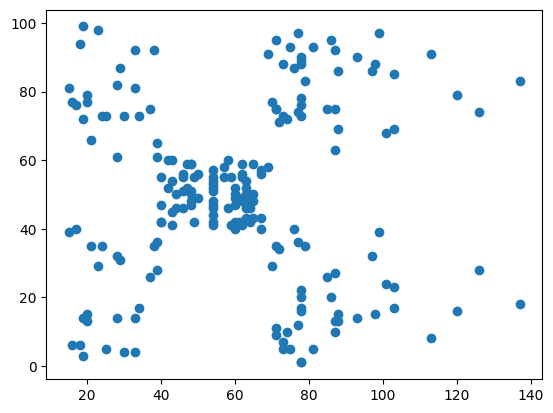

In [ ]:
# Lấy hai cột 'Annual Income (k$)' và 'Spending Score (1-100)' làm dữ liệu đặc trưng
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Vẽ biểu đồ phân tán giữa thu nhập hằng năm và điểm chi tiêu
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

# Hiển thị biểu đồ
plt.show()


This looks promising, we can see our customers seem to fall into ~5 categories:
 1. __Low__ income, __high__ spending.
 2. __High__ income, __low__ spending.
 3. __Low__ income, __low__ spending.
 4. __High__ income, __low__ spending.
 5. __Medium__ income, __medium__ spending.

If we manage to segment our existing customers into these 5 categories, we will obtain exactly the information John requires:


### Clustering the data using K Means

Let's start clustering our data!

To do so, we simply load the <code>sklearn.cluster.KMeans</code> object - with our desired number of clusters <code>k = 5</code>:


In [8]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

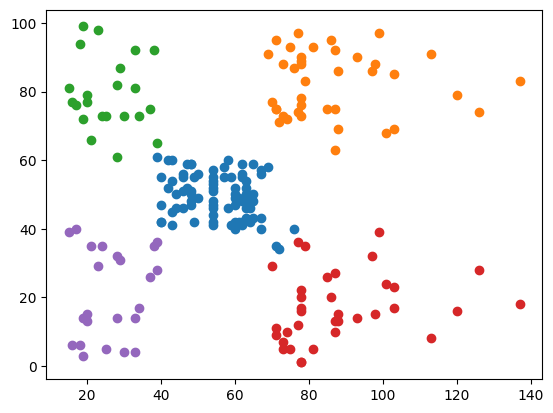

In [9]:
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['Annual Income (k$)'], X_['Spending Score (1-100)'], label=label)
plt.show()

Awesome! Our KMeans algorithm was able to correctly group our data into the 5 categories that we initially noticed


## Example 3: Image Segmentation

Image segmentation is the process of locating objects and boundaries in an image.

Various clustering can be used for this task.

__How__ is this done?:
 1. We cluster pixels using their brightness (grayscale) or RGB values (color).
 2. We replace each pixel with the average brightness or RGB value of pixels in their cluster.

Let's look at an example using KMeans:


### Loading the data

Let's start by loading the data into a <code>numpy.array</code> and taking a look at the image:


The image is 490px by 487px


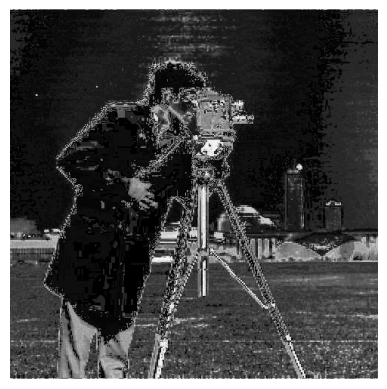

In [11]:
# Import thư viện cần thiết để đọc ảnh từ URL
import urllib.request
from PIL import Image

# Mở và đọc ảnh từ URL bằng Pillow thông qua urllib
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png'
img = np.array(Image.open(urllib.request.urlopen(url)))

# In kích thước của ảnh (số pixel theo chiều cao và chiều rộng)
print(f'The image is {img.shape[0]}px by {img.shape[1]}px')

# Ẩn trục tọa độ
plt.axis('off')

# Hiển thị ảnh
plt.imshow(img, cmap='gray')
plt.show()


### Segmenting the image using 2 clusters

In this example, we will segment our image into <code>k = 2</code> color-clusters:


In [12]:
k = 2

X = img.reshape(-1, 1)
km = KMeans(n_clusters=k, random_state=42)

In [13]:
km.fit(X)

KMeans(n_clusters=2, random_state=42)

Let's see our segmented image; once we replace each pixel with the mean of the cluster it belongs to:


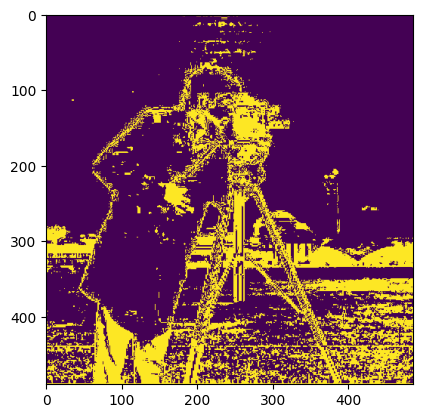

In [ ]:
# Tạo mảng seg có cùng kích thước với X, ban đầu toàn giá trị 0 (dùng để lưu kết quả phân cụm)
seg = np.zeros(X.shape)

# Lặp qua từng cụm (từ 0 đến k-1)
for i in range(k):
    # Với các điểm thuộc cụm i, gán giá trị pixel bằng tâm cụm tương ứng
    seg[km.labels_ == i] = km.cluster_centers_[i]

# Đưa mảng seg về lại kích thước ảnh gốc để hiển thị
seg = seg.reshape(img.shape)

# Hiển thị ảnh sau khi được phân cụm (mỗi cụm thể hiện vùng màu khác nhau)
plt.imshow(seg)


Awesome! Even as humans, we can still easily recognize our image after segmentation with <code>k = 2</code> colors.

### Converting to black and white

Alternatively, we may view the image in black and white:


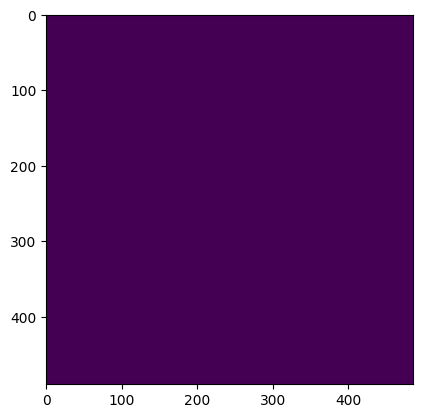

In [ ]:
# Tạo mảng seg cùng kích thước với X, ban đầu toàn giá trị 0
seg = np.zeros(X.shape)

# Lặp qua từng cụm (0 → k-1)
for i in range(k):
    # Với các điểm thuộc cụm i:
    # Nếu tâm cụm > 0.5 → gán giá trị 255 (màu trắng)
    # Ngược lại → gán giá trị 0 (màu đen)
    seg[km.labels_ == i] = 255 if km.cluster_centers_[i] > 0.5 else 0

# Đưa mảng seg về kích thước ảnh gốc và ép kiểu sang uint8 để hiển thị
seg = seg.reshape(img.shape).astype(np.uint8)

# Hiển thị ảnh phân cụm (ảnh nhị phân: trắng và đen)
plt.imshow(seg)


# Exercises

In this section, we will segment another image; this time in full-color with various values for k.

Please run the following cell to load the data for the exercises:


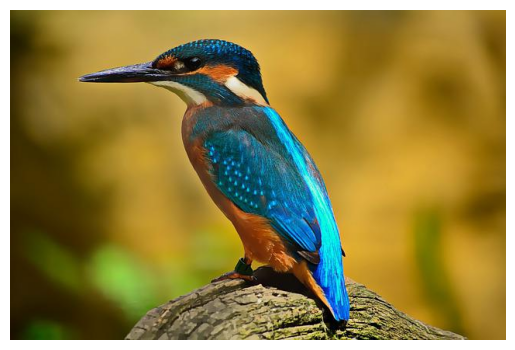

In [17]:
# Import thư viện để đọc ảnh từ URL
import urllib.request
from PIL import Image

# Đọc ảnh từ URL bằng Pillow thông qua urllib
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/kingfisher.jpeg'
img = np.array(Image.open(urllib.request.urlopen(url)))

# Hiển thị ảnh
plt.imshow(img)
plt.axis('off')
plt.show()


### Exercise 1 - Fitting KMeans With k=2


In [18]:
# Enter your solution here
# Số cụm cần phân loại (ở đây chọn 2 cụm)
k = 2

# Chuyển ảnh thành mảng 2D: mỗi hàng là một pixel, mỗi cột là giá trị R, G, B
X = img.reshape(-1, 3)  # Vì ảnh là RGB nên có 3 kênh màu

# Tạo mô hình KMeans với 2 cụm và đặt random_state để tái tạo kết quả giống nhau
km = KMeans(n_clusters=k, random_state=42)

# Huấn luyện mô hình KMeans trên dữ liệu ảnh (phân cụm các pixel theo màu sắc)
km.fit(X)


KMeans(n_clusters=2, random_state=42)

<details>
    <summary>Click here for Solution</summary>

```python
k = 2

X = img.reshape(-1, 3) # Remember, since image is RGB
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)
```

</details>


### Exercise 2 - Viewing Segmented Image


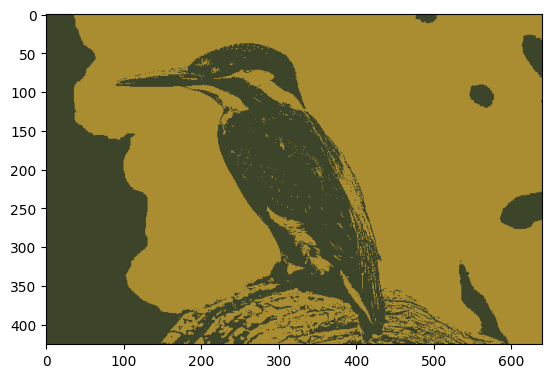

In [19]:
# Enter your solution here
# Tạo mảng seg có cùng kích thước với X, ban đầu toàn giá trị 0
seg = np.zeros(X.shape)

# Lặp qua từng cụm (0 → k-1)
for i in range(k):
    # Gán các điểm thuộc cụm i bằng giá trị màu của tâm cụm tương ứng
    seg[km.labels_ == i] = km.cluster_centers_[i]

# Đưa mảng seg về lại kích thước ảnh gốc và ép kiểu sang uint8 để hiển thị đúng màu
seg = seg.reshape(img.shape).astype(np.uint8)

# Hiển thị ảnh sau khi phân cụm (mỗi cụm thể hiện một vùng màu khác nhau)
plt.imshow(seg)


<details>
    <summary>Click here for Solution</summary>

```python
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)
```

</details>


### Exercise 3 - Fitting KMeans With k=4 and Viewing Segmented Image


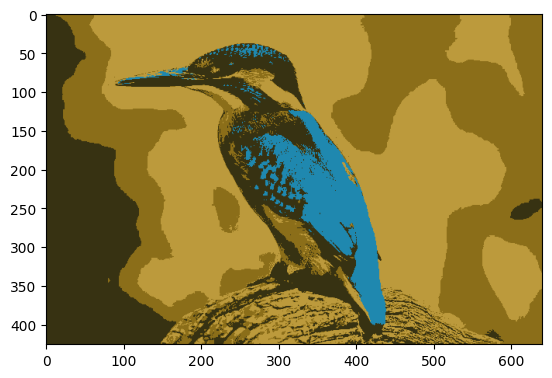

In [20]:
# Enter your solution here
# Số cụm cần phân loại (ở đây chọn 4 cụm)
k = 4

# Chuyển ảnh thành mảng 2D: mỗi hàng là một pixel, mỗi cột là giá trị R, G, B
X = img.reshape(-1, 3)  # Vì ảnh là RGB nên có 3 kênh màu

# Tạo mô hình KMeans với 4 cụm và đặt random_state để đảm bảo kết quả tái lập
km = KMeans(n_clusters=k, random_state=42)

# Huấn luyện mô hình KMeans trên dữ liệu ảnh
km.fit(X)

# Tạo mảng seg có cùng kích thước với X để lưu kết quả sau phân cụm
seg = np.zeros(X.shape)

# Lặp qua từng cụm (0 → k-1)
for i in range(k):
    # Gán màu của các pixel thuộc cụm i bằng tâm cụm tương ứng
    seg[km.labels_ == i] = km.cluster_centers_[i]

# Đưa mảng seg về lại kích thước ảnh gốc và ép kiểu sang uint8 để hiển thị đúng màu
seg = seg.reshape(img.shape).astype(np.uint8)

# Hiển thị ảnh sau khi phân cụm (mỗi cụm là một vùng màu khác nhau)
plt.imshow(seg)


<details>
    <summary>Click here for Solution</summary>

```python
k = 4

X = img.reshape(-1, 3) # Remember, since image is RGB
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)
```

</details>


Congratulations! You've completed the exercises. Later, you will learn about another clustering algorithm, GMM, which performs even better on image segmentation.


### Thank you for completing this lab!

## Author


[David Pasternak](https://www.linkedin.com/in/david-pasternak-6b84a2208/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)

[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)

### Other Contributors


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2022-03-28        | 0.1     | David Pasternak      | Created Lab    |
| 2022-05-10        | 0.2     | Sam Prokopchuk      | Complete Draft of Lab    |

## <h3 align="center"> © IBM Corporation 2022. All rights reserved. <h3/>
